# Runge-Kutta and The Advanced Pendulum

The Runge-Kutta methods are a family of iterative numerical techniques used for solving ordinary differential equations (ODEs). ODEs describe the rate at which a variable changes with respect to another variable, typically time. Runge-Kutta methods are particularly useful when analytical solutions to these equations are difficult or impossible to obtain.

The most commonly used form of the Runge-Kutta method is the fourth-order Runge-Kutta (RK4) method. The RK4 method provides a good balance between accuracy and computational efficiency.

In this notebook, we'll solve the pendulum problem using Runge-Kutta methods. We'll also use Runge-Kutta to explore the Preditor-Prey model.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

$\textbf{(1)}$ Consider the predator - prey model:

$$
R'(t) = 3R(t) − 3 · 10^{-3}R(t)F(t)
$$

$$
F'(t) = 6·10^{−4}R(t)F(t) − 0.5F(t)
$$

where $R(t)$ is a population of rabbits at time $t$ and $F(t)$ is a population of foxes at time $t$. Solve that problem using 4-step 4-order Runge-Kutta method described in the class. Take initial values $R(0)=1000$, $F(0) = 500$. Use the final time $T=15$. Draw the solutions for $R$ and $F$ in the same plot, using $τ=0.1$ and $τ=0.01$. Interpret the result.

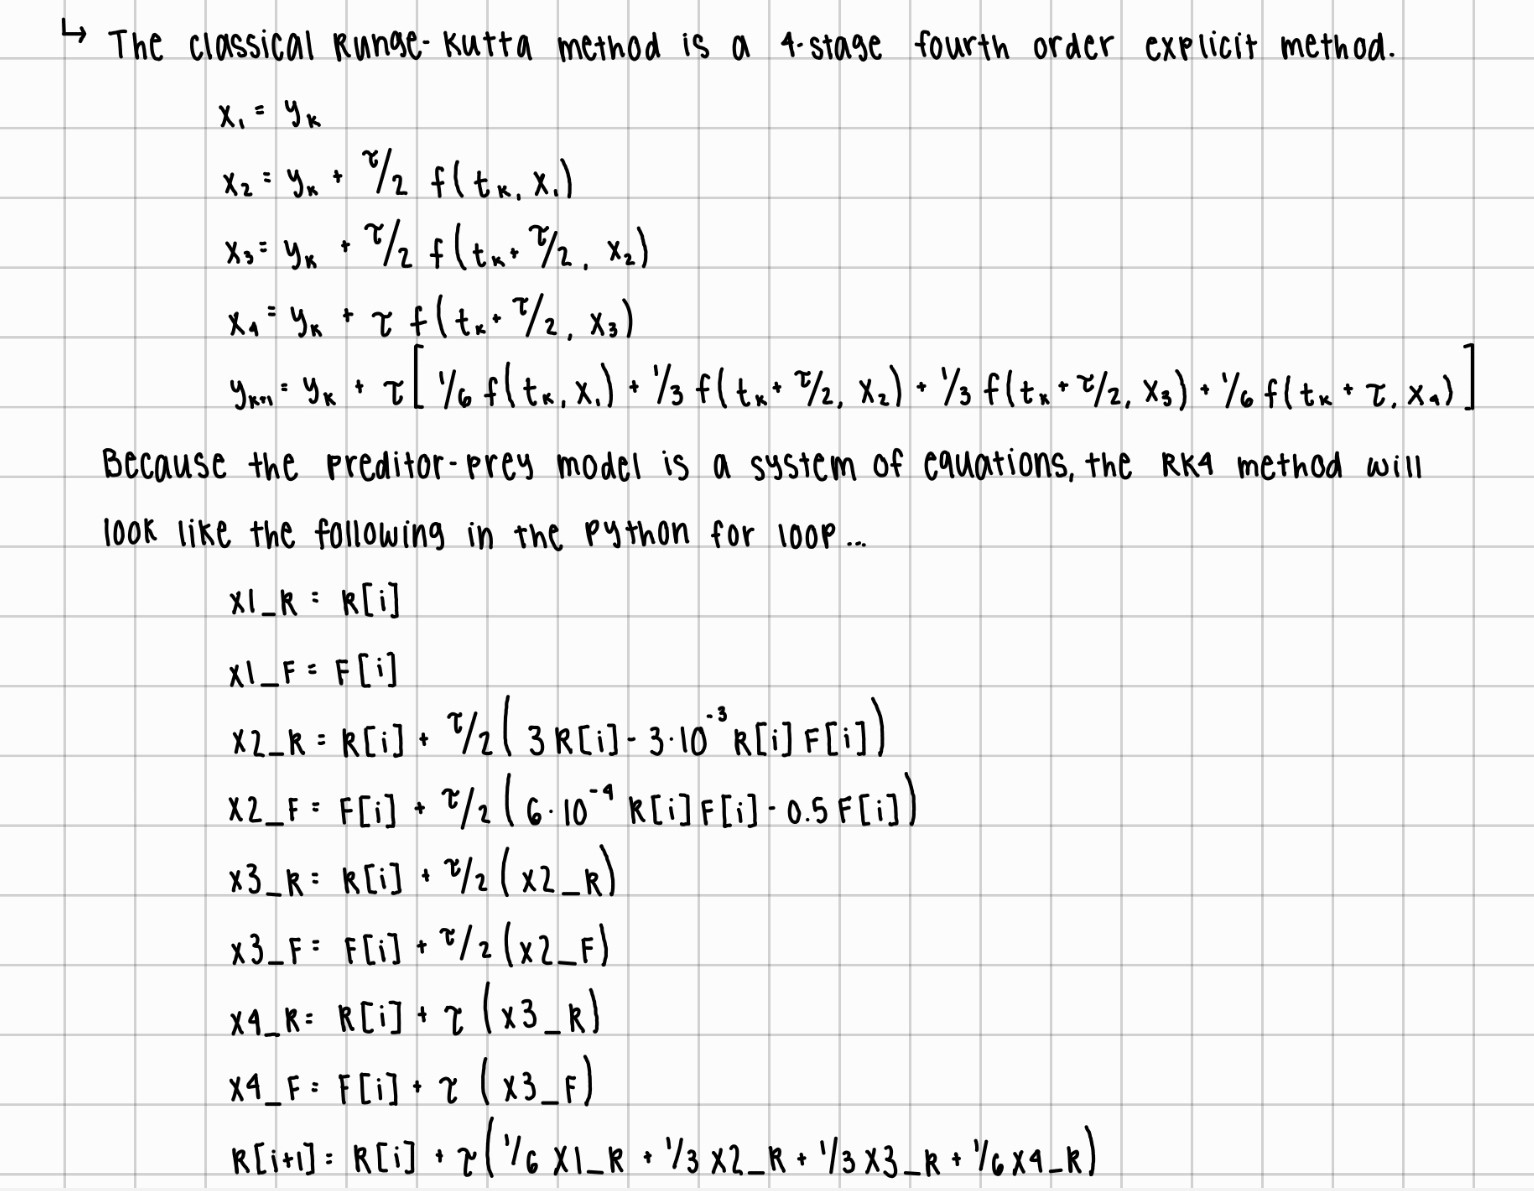

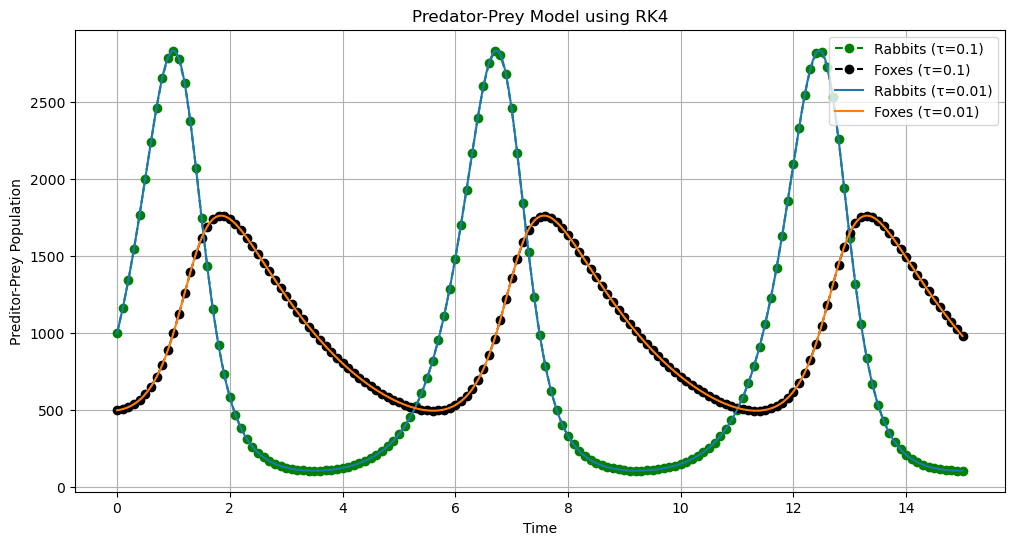

In [58]:
#definition for R differential equation
def dR_dt(t, R, F):                       
    return 3 * R - 3 * (10**-3) * R * F   

#definition for F differential equation
def dF_dt(t, R, F):                      
    return 6 * (10**-4) * R * F - 0.5 * F

#Preditor-Prey RK4 definition
def PreditorPreyRK4(dR_dt, dF_dt, R0, F0, T, tau):
    num_steps = int(T / tau)   #number of time steps
    t_values = [0]      #start time
    R_values = [R0]     #rabbits initial condition
    F_values = [F0]     #foxes initial condition

    for i in range(num_steps):
        t = t_values[-1]  #last element in list is current time
        R = R_values[-1]  #last element in list is current rabbit population
        F = F_values[-1]  #last element in list is current fox population
        
        #RK 4-step method
        x1_R = tau * dR_dt(t, R, F)  
        x1_F = tau * dF_dt(t, R, F)

        x2_R = tau * dR_dt(t + 0.5 * tau, R + 0.5 * x1_R, F + 0.5 * x1_F)
        x2_F = tau * dF_dt(t + 0.5 * tau, R + 0.5 * x1_R, F + 0.5 * x1_F)

        x3_R = tau * dR_dt(t + 0.5 * tau, R + 0.5 * x2_R, F + 0.5 * x2_F)
        x3_F = tau * dF_dt(t + 0.5 * tau, R + 0.5 * x2_R, F + 0.5 * x2_F)

        x4_R = tau * dR_dt(t + tau, R + x3_R, F + x3_F)
        x4_F = tau * dF_dt(t + tau, R + x3_R, F + x3_F)

        R_new = R + (1/6) * (x1_R + 2 * x2_R + 2 * x3_R + x4_R)
        F_new = F + (1/6) * (x1_F + 2 * x2_F + 2 * x3_F + x4_F)

        t_values.append(t + tau)  #update t for next time step
        R_values.append(R_new)    #update and store rabbit population for next time step
        F_values.append(F_new)    #update and store fox population for next time step

    return t_values, R_values, F_values

#parameters from problem
R0 = 1000
F0 = 500
T = 15
tau1 = 0.1  
tau2 = 0.01  

#calling RK4 function
t_values1, R_values1, F_values1 = PreditorPreyRK4(dR_dt, dF_dt, R0, F0, T, tau1)
t_values2, R_values2, F_values2 = PreditorPreyRK4(dR_dt, dF_dt, R0, F0, T, tau2)

#graphing
plt.figure(figsize=(12, 6))
plt.plot(t_values1, R_values1, 'go--', label='Rabbits (τ=0.1)') #used dots because graphs overlap
plt.plot(t_values1, F_values1, 'ko--', label='Foxes (τ=0.1)')   #used dots because graphs overlap
plt.plot(t_values2, R_values2, label='Rabbits (τ=0.01)')
plt.plot(t_values2, F_values2, label='Foxes (τ=0.01)')
plt.xlabel('Time')
plt.ylabel('Preditor-Prey Population')
plt.legend()
plt.title('Predator-Prey Model using RK4')
plt.grid()
plt.show()

Interpret the result:

- The population of rabbits $(R)$ and foxes $(F)$ fluctuates over time and the time step $(τ)$ affects the accuracy of the solution. The small time step $(τ = 0.01)$ is more accurate, while the large time step $(τ = 0.1)$ is less accurate.
- The populations stabilize over time and indicate some type of equilibrium between both animals' populations.

$\textbf{(2)}$ Consider the previous simple pendulum problem, described by the following
equation for the angle $θ$:

$$
\frac{d^2θ}{dt^2} + b \frac{dθ}{dt} + \frac{g}{L} \sin(θ(t)) = 0
$$

with initial conditions:

$$
θ(0)=θ_0 , \frac{dθ}{dt} (0) = \zeta_0
$$

We assume that b > 0. As before we transform the second order ODE into a system of two first-order ODEs:

$$
\textbf{y}' = \textbf{f}(\textbf{y})
$$

where $\textbf{y} = (y_1, y_2)$ and

$$
y_1 = θ, y_2 = \frac{dθ}{dt}.
$$

Consider a two-stage third-order Runge-Kutta method (also known as implicit strong stability preserving(SSP)):

$$
\textbf{x}_1 = \textbf{y}_k + ατ \textbf{f}(\textbf{x}_1)
$$

$$
\textbf{x}_2 = \textbf{y}_k + τ((1-2α)\textbf{f}(\textbf{x}_1) + α\textbf{f}(\textbf{x}_2))
$$

$$
\textbf{y}_{k+1} = \textbf{y}_k + \frac{τ}{2}(\textbf{f}(\textbf{x}_1) + \textbf{f}(\textbf{x}_2))
$$

with

$$
α = \frac{3 - \sqrt{3}}{6}.
$$

Implement this method to solve a system of ODEs for advance pendulum. Take the final time $T=25.6$, the time step value $τ=0.1$, the initial condition

$$
y_1(0) = 0.1, y_2(0) = 1
$$

and assume $g=L$. Plot the angle solution as a function of time for three values of $b= 0.1, 0.5, 1.0$ (plot the 3 curves on
the same figure). Interpret the result.

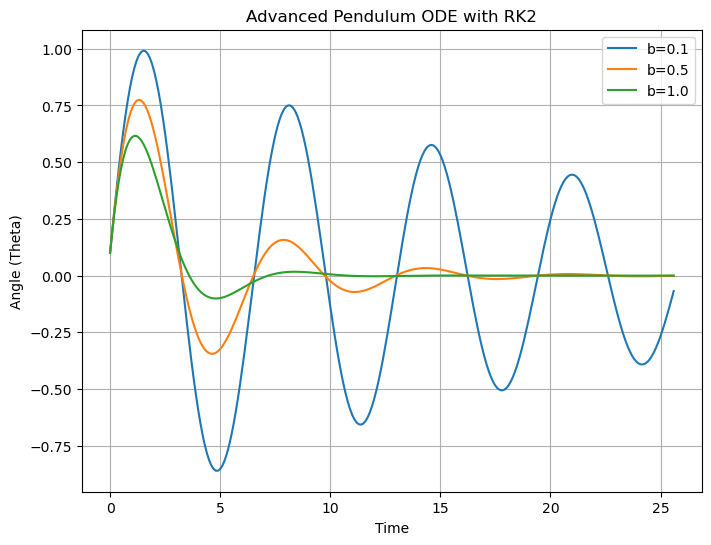

In [60]:
#definition for pendulum ODE equations
def f(y, b):
    theta, theta_deriv = y
    g_L = 1.0
    return [theta_deriv, -b * theta_deriv - g_L * np.sin(theta)]

#RK2 definition
def RK2(y, b, alpha, tau):
    x1 = [y[0] + alpha * tau * y[1], y[1] + alpha * tau * f(y, b)[1]]
    x2 = [y[0] + tau * ((1 - 2 * alpha) * f(x1, b)[0] + alpha * f(y, b)[0]), 
          y[1] + tau * ((1 - 2 * alpha) * f(x1, b)[1] + alpha * f(y, b)[1])]
    y_next = [y[0] + (tau / 2) * (f(y, b)[0] + f(x2, b)[0]), y[1] + (tau / 2) * (f(y, b)[1] + f(x2, b)[1])]
    return y_next

#solve pendulum problem
def solve_pendulum(b, tau, y0, T):
    alpha = (3 - np.sqrt(3)) / 6     #alpha given in problem
    num_steps = int(T / tau) + 1     #number of time steps
    t = np.linspace(0, T, num_steps) #array t that is the time values at each pendulum angle
    y = np.zeros((num_steps, 2))     #2D array to hold values of theta and theta_deriv at each time step
    y[0] = y0                        #initial condition

    for i in range(1, num_steps):    #for loop runs from 1 to num_steps-1
        y[i] = RK2(y[i - 1], b, alpha, tau)  #calculates values of y at ith time step using RK2 

    return t, y[:, 0]  #return two values as tuple (y[:, 0] is theta values at each time step)

#parameters given from problem
T = 25.6
tau = 0.1
y0 = [0.1, 1.0]
b_values = [0.1, 0.5, 1.0]

#plotting
plt.figure(figsize=(8, 6))
for b in b_values:
    t, theta = solve_pendulum(b, tau, y0, T)
    plt.plot(t, theta, label=f'b={b}')

plt.legend()
plt.title('Advanced Pendulum ODE with RK2')
plt.xlabel('Time')
plt.ylabel('Angle (Theta)')
plt.grid()
plt.show()

Interpretation of the result: 
- When $b$ increases the oscillations damp out more quickly. Meaning, larger $b$ values result in faster dissipation. This leads to a more rapid convergence to the stable equilibrium position.